# sktime

https://www.sktime.net/en/stable/get_started.html

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.theta import ThetaForecaster
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.split import temporal_train_test_split

In [3]:

y = load_airline()
y_train, y_test = temporal_train_test_split(y)

fh = ForecastingHorizon(y_test.index, is_relative=False)

forecaster = ThetaForecaster(sp=12)  # monthly seasonal periodicity

forecaster.fit(y_train)
y_pred = forecaster.predict(fh)

mean_absolute_percentage_error(y_test, y_pred)

np.float64(0.08174636599799208)

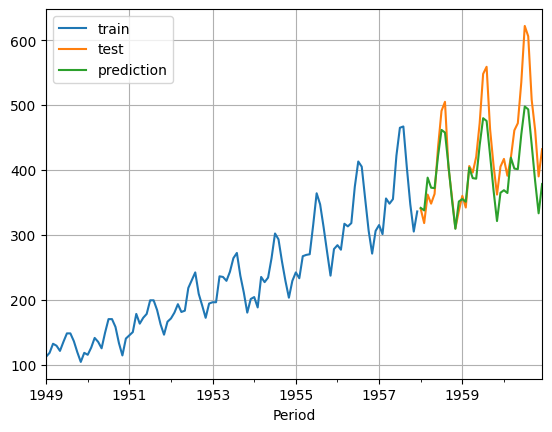

In [35]:
fig, ax = plt.subplots()

y_train.plot(ax=ax, label='train')
y_test.plot(ax=ax, label='test')
y_pred.plot(ax=ax, label='prediction')

ax.grid()
ax.legend()
plt.show()

In [36]:
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sktime.datasets import load_arrow_head
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [37]:
X, y = load_arrow_head()

X_train, X_test, y_train, y_test = train_test_split(X, y)

classifier = TimeSeriesForestClassifier()

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

accuracy_score(y_test, y_pred)

0.7924528301886793

In [46]:
X_train

,dim_0
76,0 -2.032354 1 -2.038582 2 -2.01818...
149,0 -1.622830 1 -1.622411 2 -1.59462...
83,0 -1.423259 1 -1.388275 2 -1.32325...
13,0 -1.900535 1 -1.882731 2 -1.86845...
53,0 -2.178807 1 -2.175091 2 -2.15504...
...,...
63,0 -2.547108 1 -2.549447 2 -2.46937...
11,0 -1.833709 1 -1.827681 2 -1.77645...
186,0 -1.760110 1 -1.779754 2 -1.74208...
174,0 -1.767661 1 -1.750587 2 -1.74444...


In [47]:
from sktime.datasets import load_covid_3month
from sktime.regression.distance_based import KNeighborsTimeSeriesRegressor
from sklearn.metrics import mean_squared_error  

X_train, y_train = load_covid_3month(split="train")
y_train = y_train.astype("float")

X_test, y_test = load_covid_3month(split="test")
y_test = y_test.astype("float")

regressor = KNeighborsTimeSeriesRegressor()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mean_squared_error(y_test, y_pred)

np.float64(0.002921957478363366)